# 1. Data Preparation

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Road accident.csv')

In [2]:
type(df)

pandas.core.frame.DataFrame

In [3]:
df.shape

(9550, 5)

In [4]:
df.head

<bound method NDFrame.head of      Million Plus Cities   Cause category        Cause Subcategory  \
0                   Agra  Traffic Control  Flashing Signal/Blinker   
1                   Agra  Traffic Control  Flashing Signal/Blinker   
2                   Agra  Traffic Control  Flashing Signal/Blinker   
3                   Agra  Traffic Control  Flashing Signal/Blinker   
4                   Agra  Traffic Control  Flashing Signal/Blinker   
...                  ...              ...                      ...   
9545               Vizaq          Weather              Sunny/Clear   
9546               Vizaq          Weather              Sunny/Clear   
9547               Vizaq          Weather              Sunny/Clear   
9548               Vizaq          Weather              Sunny/Clear   
9549               Vizaq          Weather              Sunny/Clear   

            Outcome of Incident   Count  
0            Greviously Injured     0.0  
1                  Minor Injury     0.0  
2  

In [5]:
df.sample(10)

,Million Plus Cities,Cause category,Cause Subcategory,Outcome of Incident,Count
4806,Bhopal,Road Features,Pot Holes,Minor Injury,0.0
3998,Meerut,Traffic Violation,Drunken Driving/ Consumption of alcohol and drug,Persons Killed,27.0
4758,Bengaluru,Road Features,Ongoing Road Works/Under Construction,Persons Killed,8.0
6275,Thrissur,Road Features,Ongoing Road Works/Under Construction,Greviously Injured,15.0
5244,Jabalpur,Road Features,Others,Total Injured,3148.0
1906,Faridabad,Junction,Staggered Junction,Minor Injury,0.0
6884,Coimbatore,Impacting Vehicle/Object,Pedestrian,Greviously Injured,89.0
8936,Kochi,Weather,Others,Minor Injury,16.0
6473,Vizaq,Road Features,Curved Road,Persons Killed,37.0
1249,Srinagar,Traffic Control,Stop Sign,Total number of Accidents,0.0


In [6]:
df.describe()

,Count
count,9547.000000
mean,103.627632
std,275.189303
min,0.000000
25%,0.000000
50%,12.000000
75%,70.500000
max,3148.000000


In [7]:
df.info

<bound method DataFrame.info of      Million Plus Cities   Cause category        Cause Subcategory  \
0                   Agra  Traffic Control  Flashing Signal/Blinker   
1                   Agra  Traffic Control  Flashing Signal/Blinker   
2                   Agra  Traffic Control  Flashing Signal/Blinker   
3                   Agra  Traffic Control  Flashing Signal/Blinker   
4                   Agra  Traffic Control  Flashing Signal/Blinker   
...                  ...              ...                      ...   
9545               Vizaq          Weather              Sunny/Clear   
9546               Vizaq          Weather              Sunny/Clear   
9547               Vizaq          Weather              Sunny/Clear   
9548               Vizaq          Weather              Sunny/Clear   
9549               Vizaq          Weather              Sunny/Clear   

            Outcome of Incident   Count  
0            Greviously Injured     0.0  
1                  Minor Injury     0.0  
2

In [8]:
# Descriptions for each column in the road accident dataset
info = [
    "Name of the city with over a million population",
    "Broad category of the cause of the accident (e.g., Driver fault, Vehicle defect)",
    "Specific subcategory detailing the exact cause (e.g., Drunk driving, Brake failure)",
    "Outcome of the accident (e.g., Fatal, Non-Fatal, Injury type)",
    "Number of incidents (i.e., accident count for that record)"
]

# Display column descriptions aligned with column names
for i in range(len(info)):
    print(f"{df.columns[i]:<25} : {info[i]}")


Million Plus Cities       : Name of the city with over a million population
Cause category            : Broad category of the cause of the accident (e.g., Driver fault, Vehicle defect)
Cause Subcategory         : Specific subcategory detailing the exact cause (e.g., Drunk driving, Brake failure)
Outcome of Incident       : Outcome of the accident (e.g., Fatal, Non-Fatal, Injury type)
Count                     : Number of incidents (i.e., accident count for that record)


In [9]:
df["Outcome of Incident"].describe()

count                   9550
unique                     5
top       Greviously Injured
freq                    2000
Name: Outcome of Incident, dtype: object

In [10]:
df["Outcome of Incident"].unique()

array(['Greviously Injured', 'Minor Injury', 'Persons Killed',
       'Total Injured', 'Total number of Accidents'], dtype=object)

# 2. Checking correlation between columns

In [11]:
from sklearn.preprocessing import LabelEncoder

# Create a copy to avoid modifying the original
df_encoded = df.copy()

# Encode non-numeric (object) columns using LabelEncoder
le = LabelEncoder()
for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object':
        df_encoded[col] = le.fit_transform(df_encoded[col])

# Now compute absolute correlation with 'target'
correlation_with_target = df_encoded.corr()["Outcome of Incident"].abs().sort_values(ascending=False)

# Display the result
print("🔍 Feature correlations with 'Outcome of Incident':\n")
print(correlation_with_target)


🔍 Feature correlations with 'Outcome of Incident':

Outcome of Incident    1.000000e+00
Count                  1.537037e-01
Cause category         4.616460e-02
Cause Subcategory      1.393332e-02
Million Plus Cities    3.346389e-16
Name: Outcome of Incident, dtype: float64


C:\Users\Dell\AppData\Local\Temp\ipykernel_14508\2785004821.py:9: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Dell\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


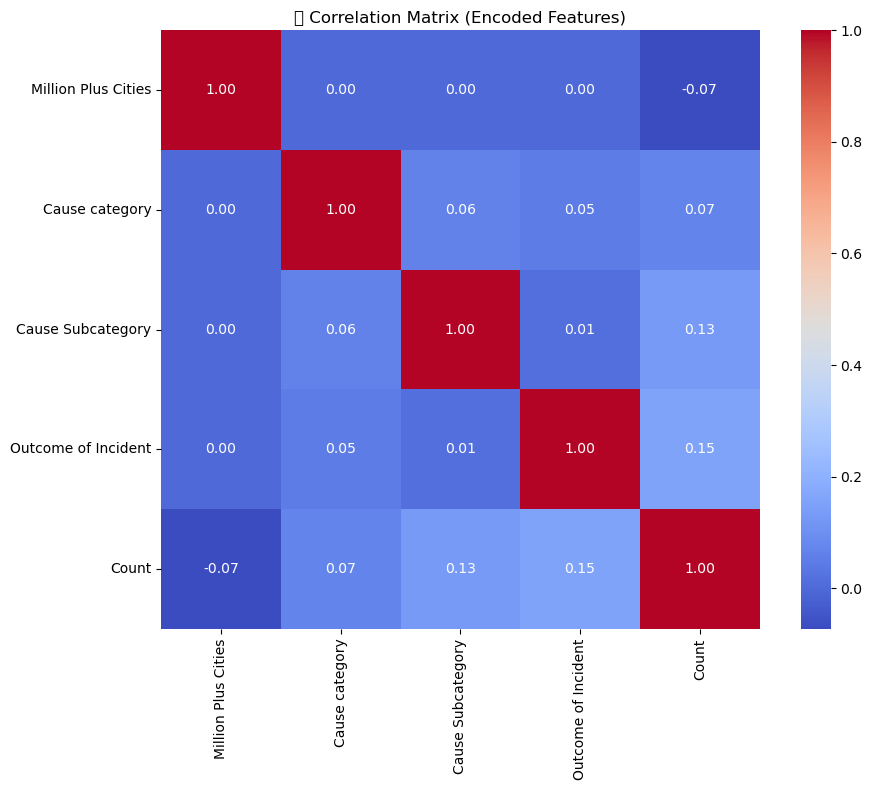

In [12]:
# visual correlations map

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("📊 Correlation Matrix (Encoded Features)")
plt.tight_layout()
plt.show()


In [13]:
# Check for missing values
print(df.isnull().sum())


Million Plus Cities    0
Cause category         0
Cause Subcategory      0
Outcome of Incident    0
Count                  3
dtype: int64


# 2. Data Cleaning

In [14]:
# Drop rows with missing values if any
df_cleaned = df.dropna()


In [15]:
# Verify the cleaning process
print(df_cleaned.isnull().sum())


Million Plus Cities    0
Cause category         0
Cause Subcategory      0
Outcome of Incident    0
Count                  0
dtype: int64


In [16]:
# Verify if any missing values remain
missing_summary = df_cleaned.isnull().sum()

if missing_summary.sum() == 0:
    print("✅ Summary: There are no missing values after cleaning.")
else:
    print("⚠️ Missing values still exist after cleaning:")
    print(missing_summary)


✅ Summary: There are no missing values after cleaning.


# 3. Exploratory Data Analysis (EDA)

C:\Users\Dell\AppData\Local\Temp\ipykernel_14508\1347552714.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


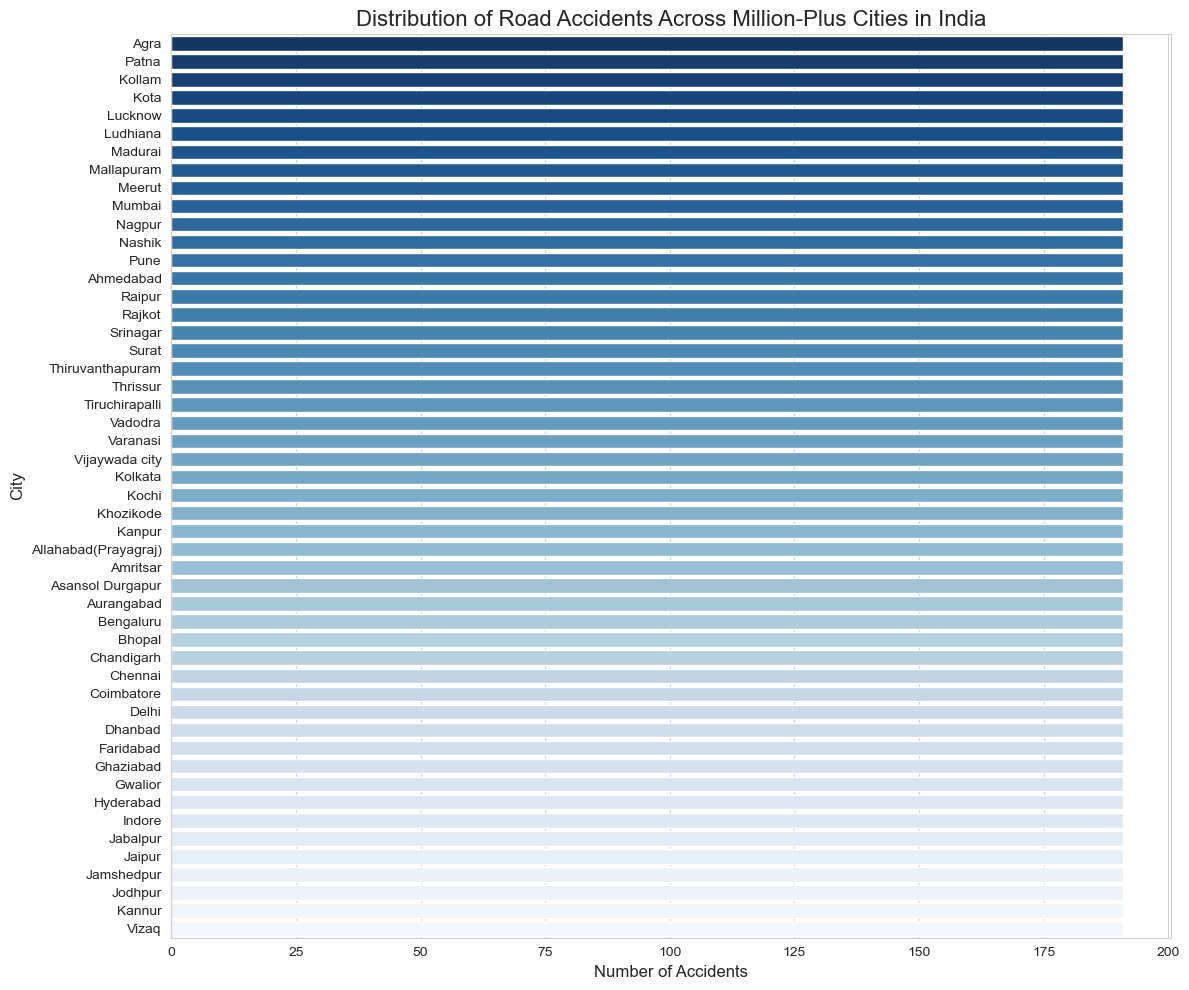

In [17]:
#  Distribution of Accidents Across Cities

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned dataset (update file path if necessary)
df_cleaned = pd.read_csv('Road accident.csv')

# Standardize column names
df_cleaned.columns = df_cleaned.columns.str.strip().str.lower().str.replace(' ', '_')

# Check if expected city column exists
if 'million_plus_cities' in df_cleaned.columns:
    city_col = 'million_plus_cities'
elif 'city' in df_cleaned.columns:
    city_col = 'city'
else:
    raise ValueError("❌ No 'city' or 'million_plus_cities' column found in the dataset.")

# Set up the bar plot
plt.figure(figsize=(12, 10))
sns.set_style("whitegrid")

# Bar plot: number of accidents per city
sns.countplot(
    y=city_col,
    data=df_cleaned,
    order=df_cleaned[city_col].value_counts().index,
    palette="Blues_r"
)

# Add titles and labels
plt.title("Distribution of Road Accidents Across Million-Plus Cities in India", fontsize=16)
plt.xlabel("Number of Accidents", fontsize=12)
plt.ylabel("City", fontsize=12)

# Show the bar plot
plt.tight_layout()
plt.show()


C:\Users\Dell\AppData\Local\Temp\ipykernel_14508\3505819706.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
C:\Users\Dell\AppData\Local\Temp\ipykernel_14508\3505819706.py:27: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Dell\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


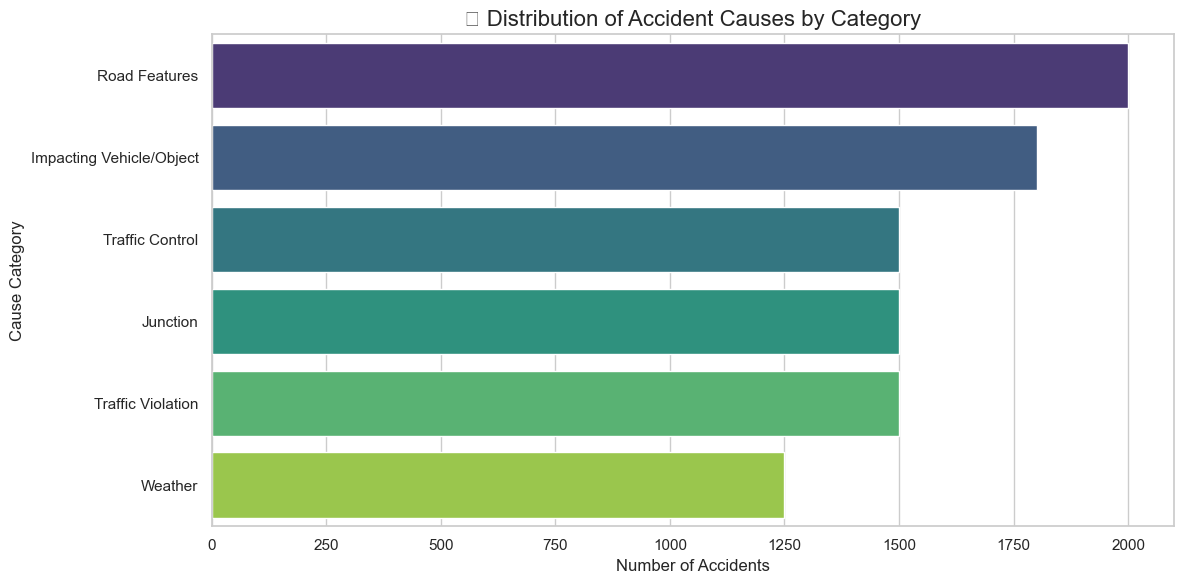

In [18]:
# Analysis of Accident Causes

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv('Road accident.csv')

# Clean column names: lowercase, no extra spaces, replace spaces with underscores
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Check if 'cause_category' column exists
if 'cause_category' in df.columns:
    # Plot the bar chart
    plt.figure(figsize=(12, 6))
    sns.set(style="whitegrid")
    sns.countplot(
        data=df,
        y='cause_category',
        order=df['cause_category'].value_counts().index,
        palette='viridis'
    )
    plt.title('📊 Distribution of Accident Causes by Category', fontsize=16)
    plt.xlabel('Number of Accidents')
    plt.ylabel('Cause Category')
    plt.tight_layout()
    plt.show()
else:
    print("❌ Column 'cause_category' not found. Please verify column names.")


C:\Users\Dell\AppData\Local\Temp\ipykernel_14508\68795876.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
C:\Users\Dell\AppData\Local\Temp\ipykernel_14508\68795876.py:29: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Dell\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


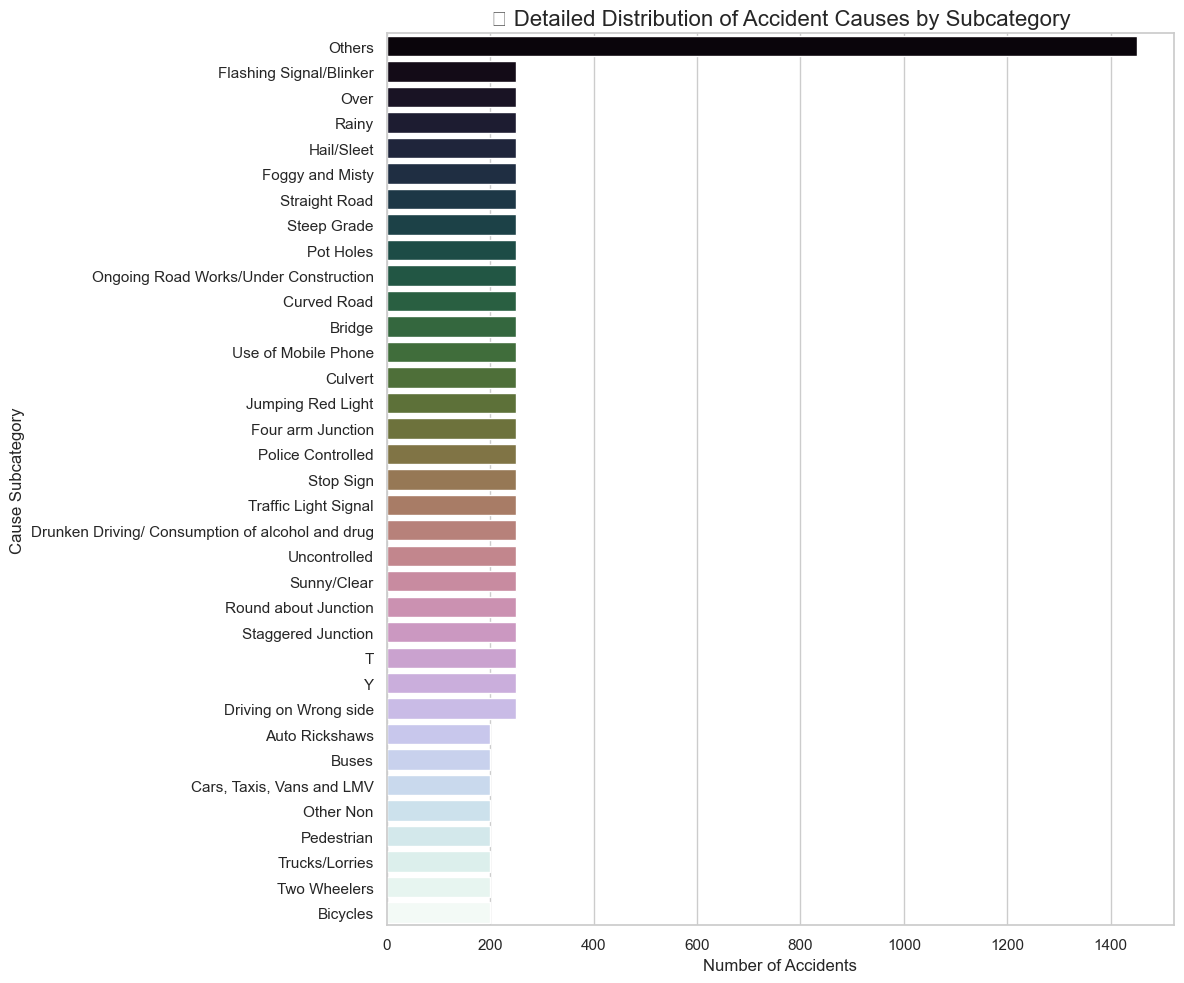

In [19]:
# Analysis of Accident Causes

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv('Road accident.csv')

# Clean column names: lowercase, no extra spaces, replace spaces with underscores
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Check if 'cause_subcategory' column exists
if 'cause_subcategory' in df.columns:
    plt.figure(figsize=(12, 10))
    sns.set(style="whitegrid")

    # Create the detailed horizontal bar plot
    sns.countplot(
        data=df,
        y='cause_subcategory',
        order=df['cause_subcategory'].value_counts().index,
        palette='cubehelix'
    )

    plt.title('🔍 Detailed Distribution of Accident Causes by Subcategory', fontsize=16)
    plt.xlabel('Number of Accidents')
    plt.ylabel('Cause Subcategory')
    plt.tight_layout()
    plt.show()
else:
    print("❌ Column 'cause_subcategory' not found. Please verify your CSV column names.")


C:\Users\Dell\AppData\Local\Temp\ipykernel_14508\3077406297.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
C:\Users\Dell\AppData\Local\Temp\ipykernel_14508\3077406297.py:27: UserWarning: Glyph 129534 (\N{RECEIPT}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Dell\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129534 (\N{RECEIPT}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


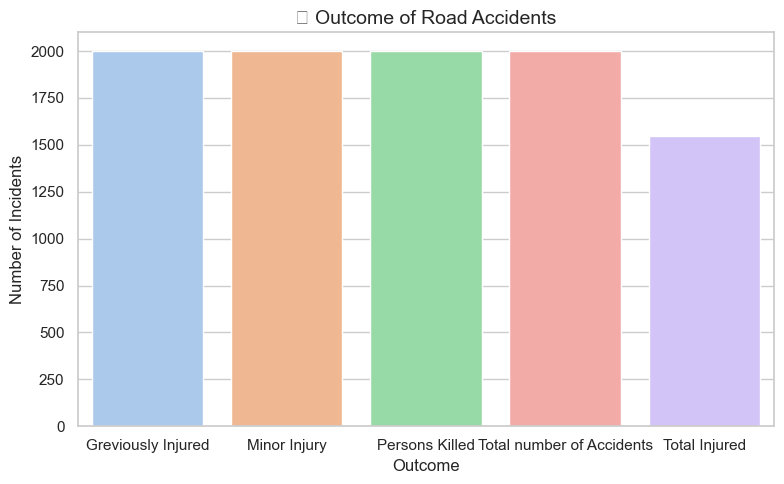

In [20]:
#  Outcomes of Incidents

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
df_cleaned = pd.read_csv('Road accident.csv')

# Standardize column names
df_cleaned.columns = df_cleaned.columns.str.strip().str.lower().str.replace(' ', '_')

# Check if the expected column exists
if 'outcome_of_incident' in df_cleaned.columns:
    # Create the bar plot
    plt.figure(figsize=(8, 5))
    sns.set(style="whitegrid")
    sns.countplot(
        x='outcome_of_incident',
        data=df_cleaned,
        order=df_cleaned['outcome_of_incident'].value_counts().index,
        palette='pastel'
    )
    plt.title('🧾 Outcome of Road Accidents', fontsize=14)
    plt.xlabel('Outcome')
    plt.ylabel('Number of Incidents')
    plt.tight_layout()
    plt.show()
else:
    print("❌ Column 'Outcome of Incident' not found. Please verify your CSV column names.")


C:\Users\Dell\AppData\Local\Temp\ipykernel_14508\1019242401.py:26: UserWarning: Glyph 129513 (\N{JIGSAW PUZZLE PIECE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Dell\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129513 (\N{JIGSAW PUZZLE PIECE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


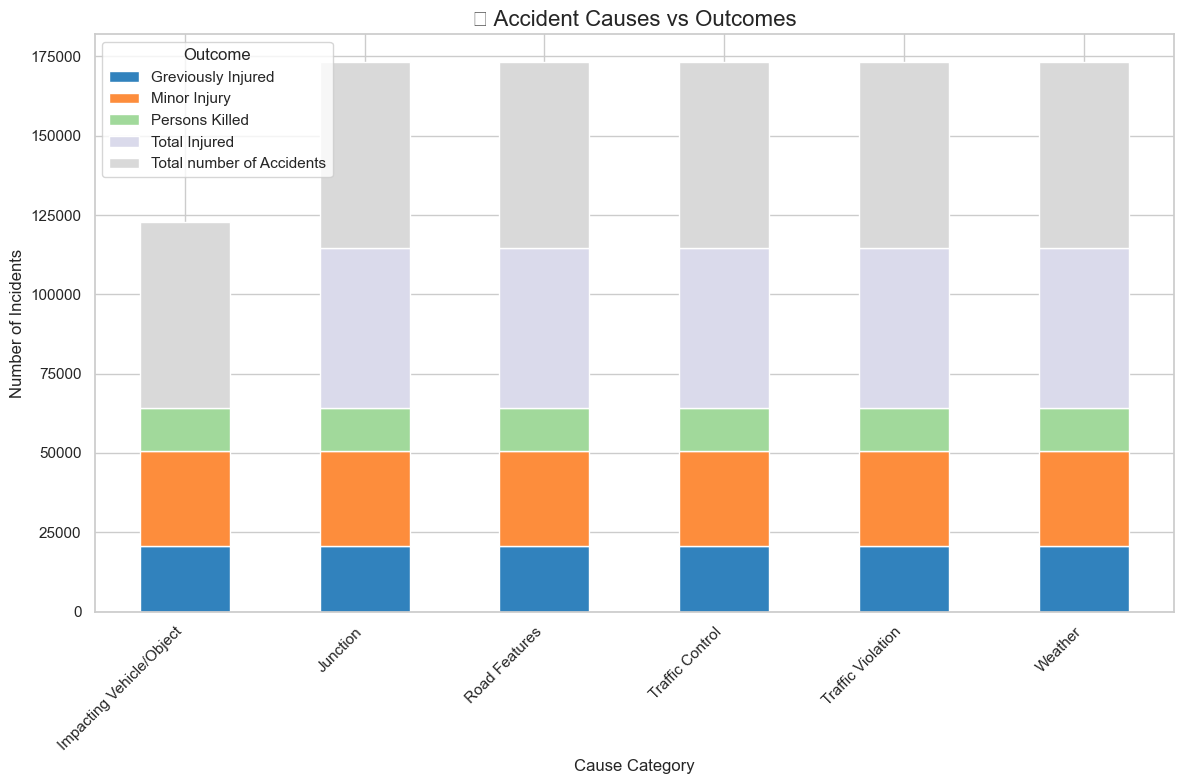

In [21]:
#  Analyzing Accident Causes vs Outcomes 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df_cleaned = pd.read_csv('Road accident.csv')

# Standardize column names
df_cleaned.columns = df_cleaned.columns.str.strip().str.lower().str.replace(' ', '_')

# Ensure required columns are present
required_columns = ['cause_category', 'outcome_of_incident', 'count']
if all(col in df_cleaned.columns for col in required_columns):

    # Group by cause category and outcome of incident, then sum the count
    outcome_vs_cause = df_cleaned.groupby(['cause_category', 'outcome_of_incident'])['count'].sum().unstack(fill_value=0)

    # Plot the stacked bar chart
    outcome_vs_cause.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab20c')
    plt.title('🧩 Accident Causes vs Outcomes', fontsize=16)
    plt.xlabel('Cause Category')
    plt.ylabel('Number of Incidents')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.legend(title='Outcome')
    plt.show()

else:
    print("❌ Required columns not found. Make sure 'cause_category', 'outcome_of_incident', and 'count' exist in your dataset.")


# Conclusion

C:\Users\Dell\AppData\Local\Temp\ipykernel_14508\586480554.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Dell\AppData\Local\Temp\ipykernel_14508\586480554.py:30: UserWarning: Glyph 127961 (\N{CITYSCAPE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Dell\AppData\Local\Temp\ipykernel_14508\586480554.py:30: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Dell\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127961 (\N{CITYSCAPE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Dell\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


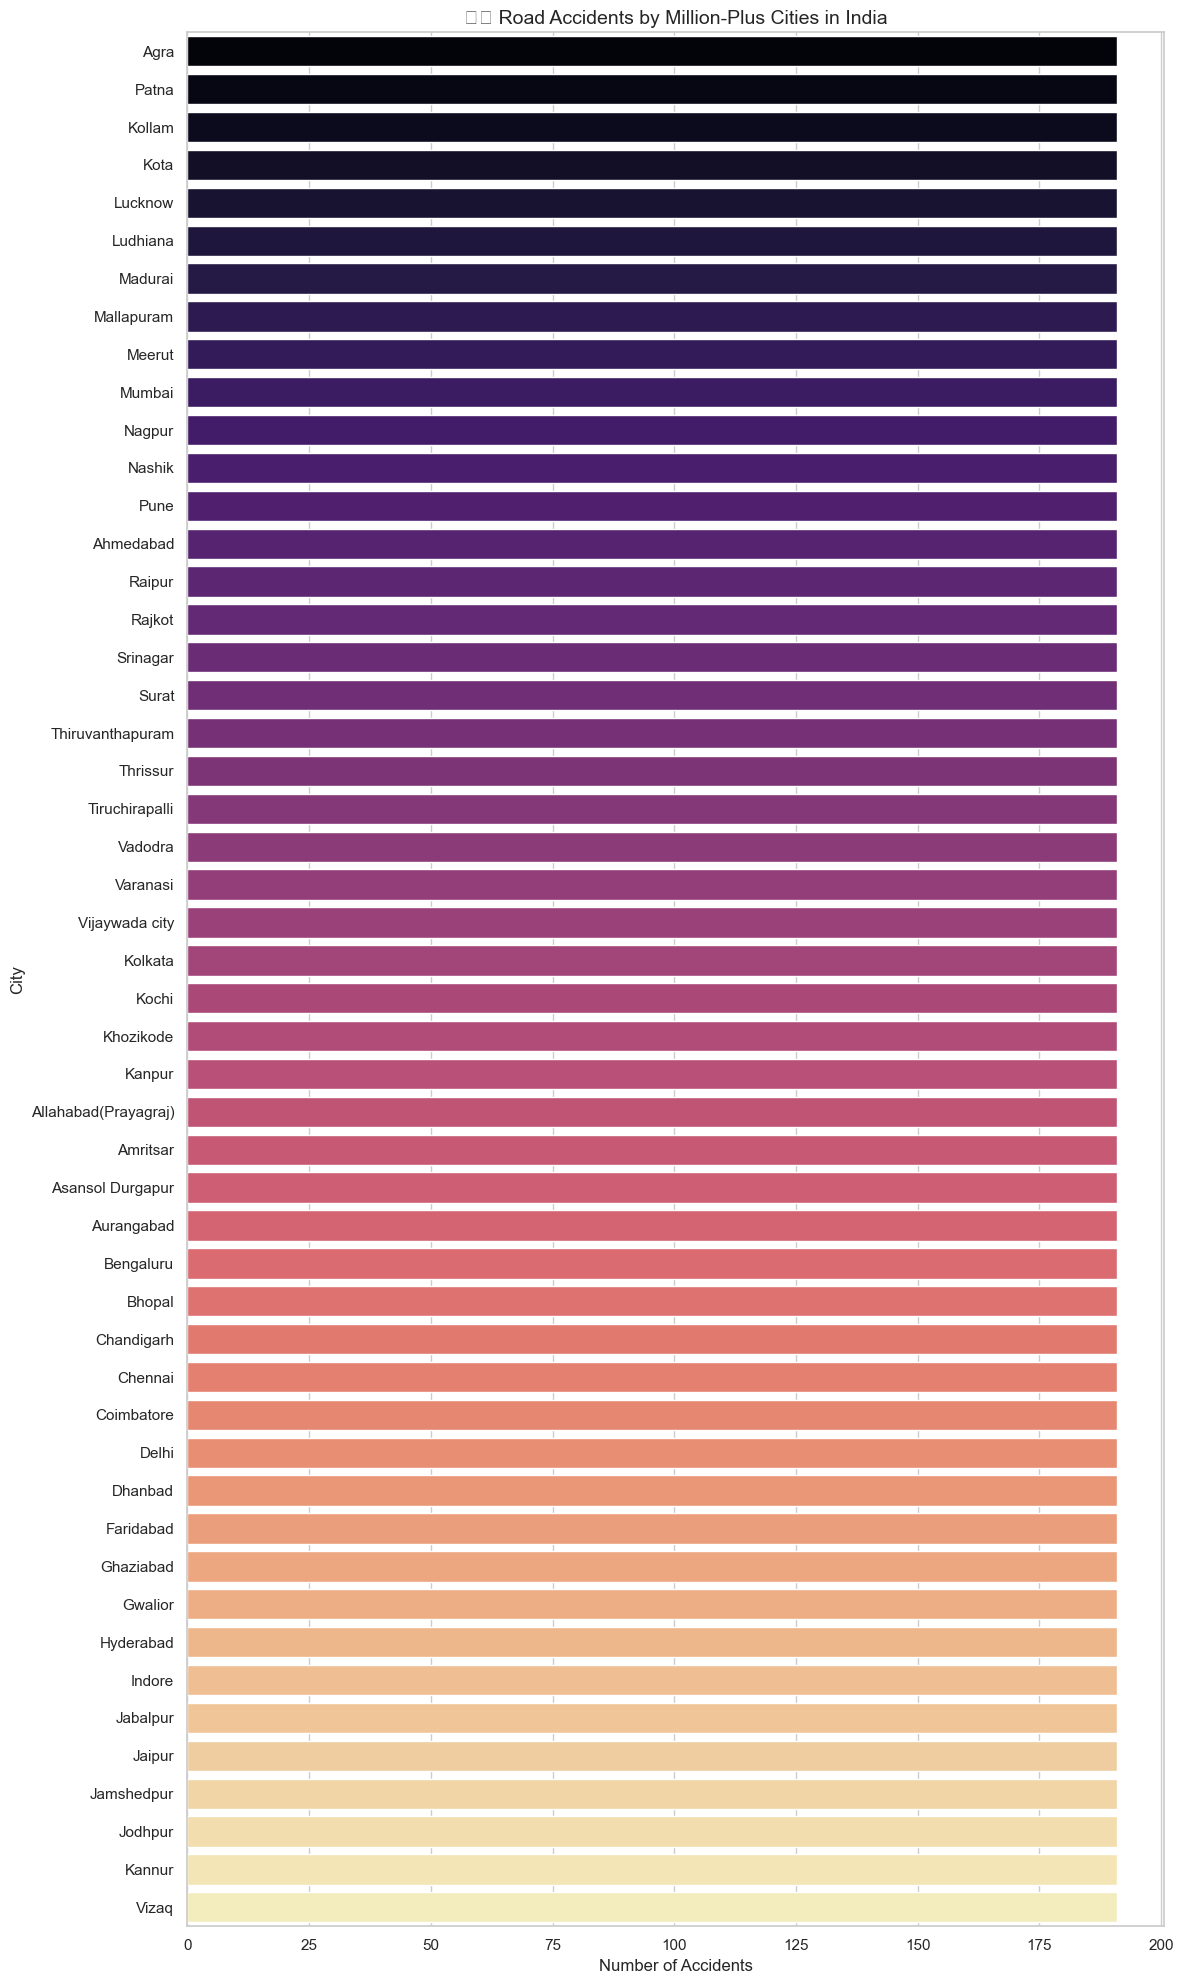

📊 Number of Accidents in Each Million-Plus City:
million_plus_cities
Agra                    191
Patna                   191
Kollam                  191
Kota                    191
Lucknow                 191
Ludhiana                191
Madurai                 191
Mallapuram              191
Meerut                  191
Mumbai                  191
Nagpur                  191
Nashik                  191
Pune                    191
Ahmedabad               191
Raipur                  191
Rajkot                  191
Srinagar                191
Surat                   191
Thiruvanthapuram        191
Thrissur                191
Tiruchirapalli          191
Vadodra                 191
Varanasi                191
Vijaywada city          191
Kolkata                 191
Kochi                   191
Khozikode               191
Kanpur                  191
Allahabad(Prayagraj)    191
Amritsar                191
Asansol Durgapur        191
Aurangabad              191
Bengaluru               191
Bhopal 

In [22]:
# Identify the cities with the highest number of accidents.
# accidents count highest to lowest

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Road accident.csv')

# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Check if required column exists
if 'million_plus_cities' in df.columns:
    # Group and count accidents per city
    city_accident_counts = df['million_plus_cities'].value_counts()

    # Plot all cities
    plt.figure(figsize=(12, len(city_accident_counts) * 0.4))  # Dynamically adjust height
    sns.set(style="whitegrid")
    sns.barplot(
        y=city_accident_counts.index,
        x=city_accident_counts.values,
        palette='magma'
    )
    plt.title('🏙️ Road Accidents by Million-Plus Cities in India', fontsize=14)
    plt.xlabel('Number of Accidents')
    plt.ylabel('City')
    plt.tight_layout()
    plt.show()

    # Print the full city accident counts
    print("📊 Number of Accidents in Each Million-Plus City:")
    print(city_accident_counts)

else:
    print("❌ Column 'Million Plus Cities' not found. Please check your dataset.")


C:\Users\Dell\AppData\Local\Temp\ipykernel_14508\5401644.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Dell\AppData\Local\Temp\ipykernel_14508\5401644.py:29: UserWarning: Glyph 128679 (\N{CONSTRUCTION SIGN}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Dell\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128679 (\N{CONSTRUCTION SIGN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


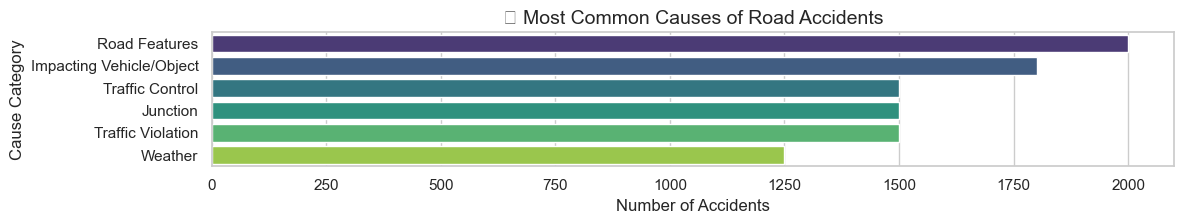

📌 Accident Causes Sorted by Frequency:
cause_category
Road Features               2000
Impacting Vehicle/Object    1800
Traffic Control             1500
Junction                    1500
Traffic Violation           1500
Weather                     1250
Name: count, dtype: int64


In [23]:
# Highlight the most common causes of accidents.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('Road accident.csv')

# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Check if 'cause_category' column exists
if 'cause_category' in df.columns:
    # Count accidents by cause
    cause_counts = df['cause_category'].value_counts()

    # Plot
    plt.figure(figsize=(12, len(cause_counts) * 0.4))
    sns.set(style="whitegrid")
    sns.barplot(
        y=cause_counts.index,
        x=cause_counts.values,
        palette='viridis'
    )
    plt.title('🚧 Most Common Causes of Road Accidents', fontsize=14)
    plt.xlabel('Number of Accidents')
    plt.ylabel('Cause Category')
    plt.tight_layout()
    plt.show()

    # Print all causes sorted by frequency
    print("📌 Accident Causes Sorted by Frequency:")
    print(cause_counts)
else:
    print("❌ Column 'Cause category' not found. Please check your dataset.")



C:\Users\Dell\AppData\Local\Temp\ipykernel_14508\1860067831.py:30: UserWarning: Glyph 9878 (\N{SCALES}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Dell\AppData\Local\Temp\ipykernel_14508\1860067831.py:30: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Dell\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9878 (\N{SCALES}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Dell\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


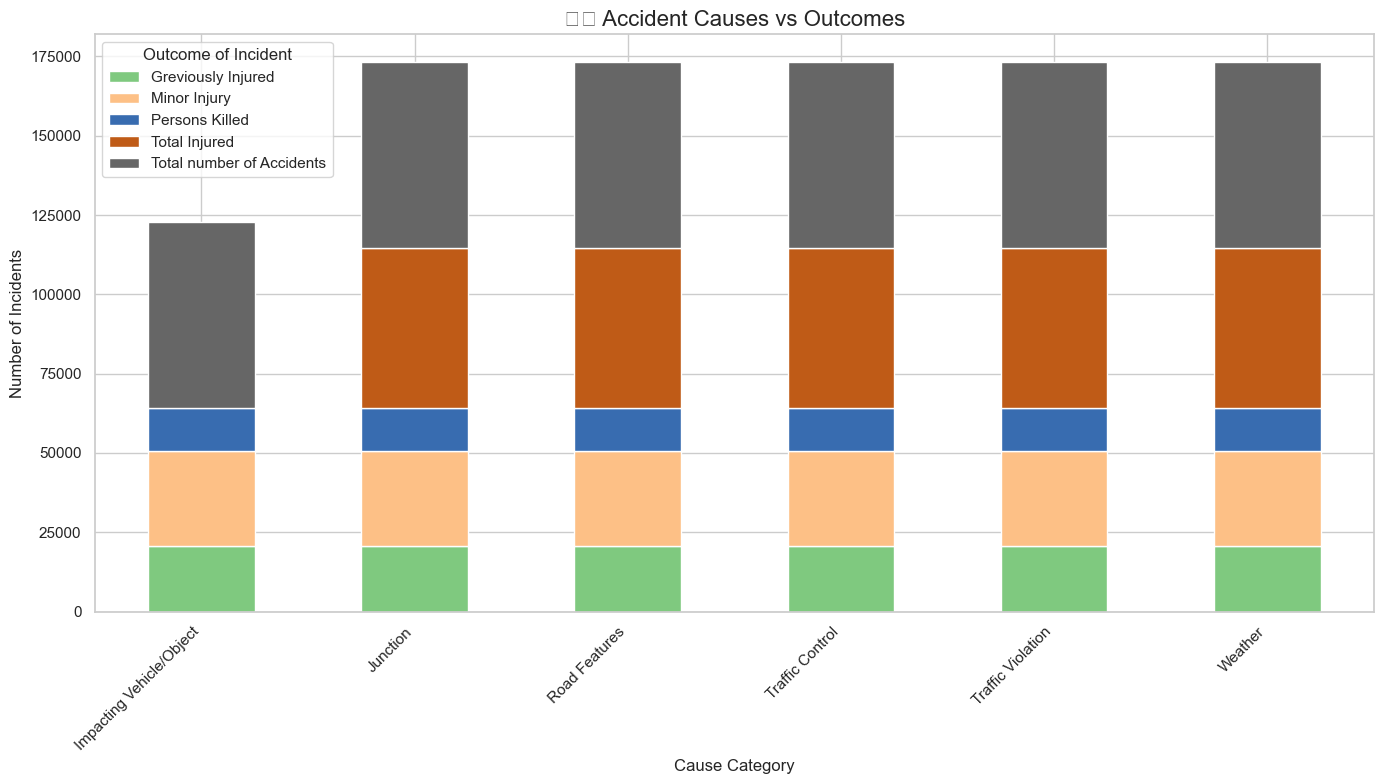

📊 Relationship Between Causes and Outcomes:

outcome_of_incident       Greviously Injured  Minor Injury  Persons Killed  \
cause_category                                                               
Impacting Vehicle/Object             20532.0       29983.0         13542.0   
Junction                             20532.0       29983.0         13542.0   
Road Features                        20532.0       29983.0         13542.0   
Traffic Control                      20532.0       29983.0         13542.0   
Traffic Violation                    20532.0       29983.0         13542.0   
Weather                              20532.0       29983.0         13542.0   

outcome_of_incident       Total Injured  Total number of Accidents  
cause_category                                                      
Impacting Vehicle/Object            0.0                    58736.0  
Junction                        50515.0                    58736.0  
Road Features                   50515.0               

In [24]:
# Discuss the Relationship Between Accident Causes and Outcomes

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('Road accident.csv')

# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Create dummy 'count' column if not already present
if 'count' not in df.columns:
    df['count'] = 1  # Assume each row is one accident

# Check for required columns
required_cols = ['cause_category', 'outcome_of_incident', 'count']
if all(col in df.columns for col in required_cols):
    # Group by cause category and outcome, summing the count
    outcome_vs_cause = df.groupby(['cause_category', 'outcome_of_incident'])['count'].sum().unstack(fill_value=0)

    # Plot the stacked bar chart
    outcome_vs_cause.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='Accent')
    plt.title('⚖️ Accident Causes vs Outcomes', fontsize=16)
    plt.xlabel('Cause Category')
    plt.ylabel('Number of Incidents')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Outcome of Incident')
    plt.tight_layout()
    plt.show()

    # Print the data table
    print("📊 Relationship Between Causes and Outcomes:\n")
    print(outcome_vs_cause)
else:
    print("❌ Required columns not found. Make sure your dataset contains 'cause_category', 'outcome_of_incident', and 'count'.")


In [25]:
import pandas as pd

# Load and clean dataset
df = pd.read_csv("Road accident.csv")
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# --- Step 1: Total incidents per cause ---
total_by_cause = df.groupby("cause_category")["count"].sum()

# --- Step 2: Fatal incidents per cause ---
fatal_by_cause = df[df["outcome_of_incident"] == "Fatal"].groupby("cause_category")["count"].sum()

# --- Step 3: Create DataFrame with both and compute % Fatal ---
cause_stats = pd.DataFrame({
    "total_accidents": total_by_cause,
    "fatal_accidents": fatal_by_cause
}).fillna(0)

cause_stats["fatal_percentage"] = (cause_stats["fatal_accidents"] / cause_stats["total_accidents"]) * 100
cause_stats = cause_stats.sort_values("fatal_percentage", ascending=False)

# --- Step 4: Display ---
print("💀 Accident Cause Fatality Rates (%):\n")
print(cause_stats)

# Optional: Save to CSV
cause_stats.to_csv("accident_cause_fatality_rates.csv")

💀 Accident Cause Fatality Rates (%):

                          total_accidents  fatal_accidents  fatal_percentage
cause_category                                                              
Impacting Vehicle/Object         122793.0              0.0               0.0
Junction                         173308.0              0.0               0.0
Road Features                    173308.0              0.0               0.0
Traffic Control                  173308.0              0.0               0.0
Traffic Violation                173308.0              0.0               0.0
Weather                          173308.0              0.0               0.0


# Spliting the data into training data and test data

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Step 1: Load and clean the dataset
df = pd.read_csv("Road accident.csv")
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Step 2: Clean 'count' column and remove invalid entries
df = df[df['count'].notnull()]
df = df[df['count'] > 0]
df['count'] = df['count'].astype(int)

# Step 3: Expand dataset by 'count'
df_expanded = df.loc[df.index.repeat(df['count'])].reset_index(drop=True)

# Step 4: Drop 'count' column after expansion
df_expanded.drop(columns='count', inplace=True)

# Step 5: Encode categorical features
X = pd.get_dummies(df_expanded.drop(columns='outcome_of_incident'))

# Step 6: Encode target variable
le = LabelEncoder()
y = le.fit_transform(df_expanded['outcome_of_incident'])

# Step 7: Split into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Step 8: Output shape summaries
print("✅ Dataset successfully split:")
print(f"Training Features Shape: {X_train.shape}")
print(f"Test Features Shape: {X_test.shape}")
print(f"Training Labels Distribution:\n{pd.Series(y_train).value_counts()}")
print(f"Test Labels Distribution:\n{pd.Series(y_test).value_counts()}")


✅ Dataset successfully split:
Training Features Shape: (791464, 91)
Test Features Shape: (197867, 91)
Training Labels Distribution:
4    281933
3    202060
1    143918
0     98553
2     65000
Name: count, dtype: int64
Test Labels Distribution:
4    70483
3    50515
1    35980
0    24639
2    16250
Name: count, dtype: int64


# Decision Tree

🌳 Decision Tree Results
Accuracy: 0.35701253872550753
                           precision    recall  f1-score   support

       Greviously Injured       0.43      0.02      0.04     24639
             Minor Injury       0.37      0.03      0.05     35980
           Persons Killed       0.27      0.00      0.01     16250
            Total Injured       0.32      0.24      0.27     50515
Total number of Accidents       0.37      0.81      0.50     70483

                 accuracy                           0.36    197867
                macro avg       0.35      0.22      0.17    197867
             weighted avg       0.35      0.36      0.26    197867



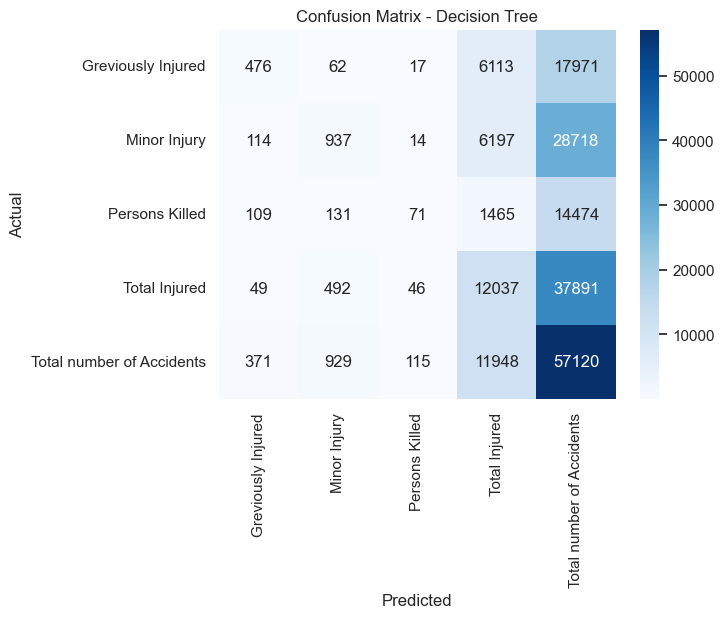

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict on the test data
y_pred_dt = dt_model.predict(X_test)

# Evaluation
print("🌳 Decision Tree Results")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt, target_names=le.classes_))

# Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


#  Random Forest

🌲 Random Forest Results
Accuracy: 0.3572601798177564
                           precision    recall  f1-score   support

       Greviously Injured       0.44      0.02      0.04     24639
             Minor Injury       0.37      0.03      0.05     35980
           Persons Killed       0.29      0.00      0.01     16250
            Total Injured       0.32      0.24      0.27     50515
Total number of Accidents       0.37      0.81      0.50     70483

                 accuracy                           0.36    197867
                macro avg       0.36      0.22      0.17    197867
             weighted avg       0.36      0.36      0.26    197867



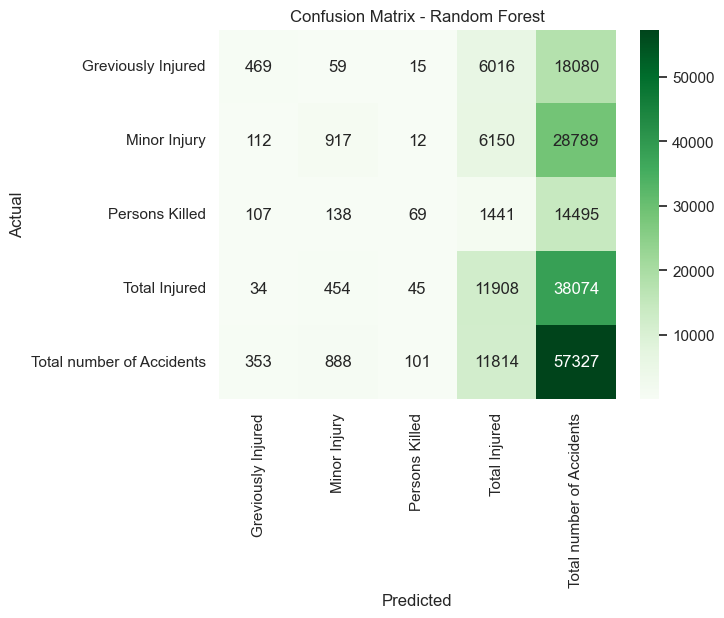

In [28]:
from sklearn.ensemble import RandomForestClassifier

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test data
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print("🌲 Random Forest Results")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf, target_names=le.classes_))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#  Logistic Regression

📈 Logistic Regression Results
Accuracy: 0.35819009738864993


C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                           precision    recall  f1-score   support

       Greviously Injured       0.45      0.00      0.00     24639
             Minor Injury       0.35      0.02      0.04     35980
           Persons Killed       0.00      0.00      0.00     16250
            Total Injured       0.33      0.19      0.24     50515
Total number of Accidents       0.36      0.86      0.51     70483

                 accuracy                           0.36    197867
                macro avg       0.30      0.21      0.16    197867
             weighted avg       0.33      0.36      0.25    197867



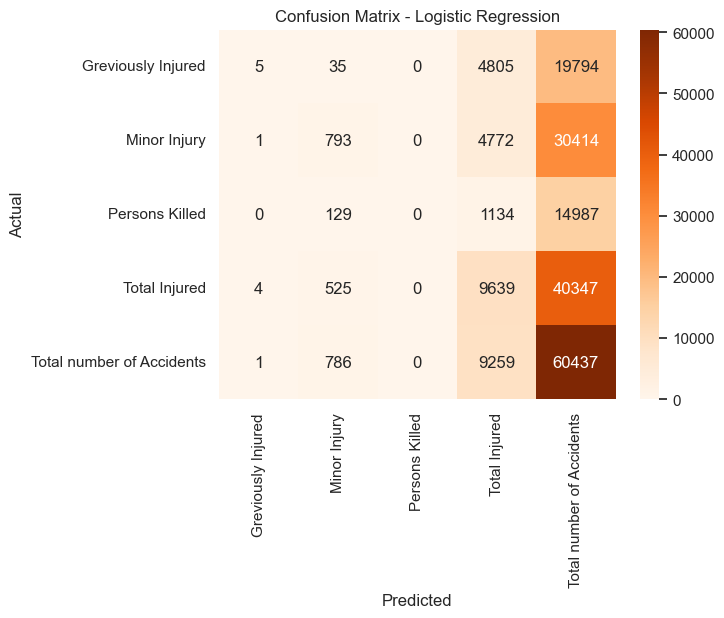

In [29]:
from sklearn.linear_model import LogisticRegression

# Train the Logistic Regression model
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

# Predict on the test data
y_pred_lr = lr_model.predict(X_test)

# Evaluation
print("📈 Logistic Regression Results")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr, target_names=le.classes_))

# Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Oranges", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Accuracy Comparison 

In [30]:
# Calculate accuracy for each model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

# Store in dictionary
accuracies = {
    'Decision Tree': accuracy_dt,
    'Random Forest': accuracy_rf,
    'Logistic Regression': accuracy_lr
}

# Find the best model
best_model = max(accuracies, key=accuracies.get)

# Print comparison
print("\n📊 Model Accuracy Comparison:")
for model, acc in accuracies.items():
    if model == best_model:
        print(f"✅ {model}: {acc * 100:.2f}% (Best)")
    else:
        print(f"   {model}: {acc * 100:.2f}%")




📊 Model Accuracy Comparison:
   Decision Tree: 35.70%
   Random Forest: 35.73%
✅ Logistic Regression: 35.82% (Best)


# Compute Mean Squared Error (MSE)

In [31]:
from sklearn.metrics import mean_squared_error

# Make sure you're using the same encoding as in training
# If `le` is your LabelEncoder:
y_test_encoded = y_test
y_pred_dt_encoded = y_pred_dt
y_pred_rf_encoded = y_pred_rf
y_pred_lr_encoded = y_pred_lr

# Compute MSE for each model
mse_dt = mean_squared_error(y_test_encoded, y_pred_dt_encoded)
mse_rf = mean_squared_error(y_test_encoded, y_pred_rf_encoded)
mse_lr = mean_squared_error(y_test_encoded, y_pred_lr_encoded)

# Print results
print("📉 Mean Squared Error (MSE) Comparison:")
print(f"🌳 Decision Tree MSE: {mse_dt:.4f}")
print(f"🌲 Random Forest MSE: {mse_rf:.4f}")
print(f"📈 Logistic Regression MSE: {mse_lr:.4f}")


📉 Mean Squared Error (MSE) Comparison:
🌳 Decision Tree MSE: 3.8058
🌲 Random Forest MSE: 3.8079
📈 Logistic Regression MSE: 3.9059


# Hyperparameter Tuning

Logistic Regression with Hyperparameter tuning

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Step 1: Define your base model
log_reg = LogisticRegression(max_iter=1000)

# Step 2: Define hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],          # Regularization strength
    'penalty': ['l2'],                    # l2 is default; use 'l1' with solvers like 'liblinear'
    'solver': ['lbfgs', 'saga', 'liblinear']
}

# Step 3: Grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid,
                           cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Step 4: Fit on training data
grid_search.fit(X_train, y_train)

# Step 5: Best parameters and score
print("✅ Best Parameters:", grid_search.best_params_)
print("📈 Best Cross-Validation Accuracy:", grid_search.best_score_)

# Step 6: Evaluate on test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))


Fitting 5 folds for each of 15 candidates, totalling 75 fits
✅ Best Parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
📈 Best Cross-Validation Accuracy: 0.3582740335277926

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00     24639
           1       0.47      0.01      0.01     35980
           2       0.00      0.00      0.00     16250
           3       0.33      0.20      0.25     50515
           4       0.36      0.86      0.51     70483

    accuracy                           0.36    197867
   macro avg       0.23      0.21      0.15    197867
weighted avg       0.30      0.36      0.25    197867



C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


 hyperparameters for a Decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Step 1: Initialize base model
dt = DecisionTreeClassifier(random_state=42)

# Step 2: Define hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Step 3: Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dt,
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,
                           verbose=1,
                           scoring='accuracy')

# Step 4: Fit on training data
grid_search.fit(X_train, y_train)

# Step 5: Best model and accuracy
best_dt = grid_search.best_estimator_
print("✅ Best Hyperparameters:\n", grid_search.best_params_)

# Step 6: Evaluate on training and test data
train_acc = accuracy_score(y_train, best_dt.predict(X_train))
test_acc = accuracy_score(y_test, best_dt.predict(X_test))

print(f"📊 Tuned Decision Tree Accuracy:\nTrain: {train_acc*100:.2f}%\nTest:  {test_acc*100:.2f}%")

# Optional: Check if overfitting or underfitting
if abs(train_acc - test_acc) > 0.15:
    print("⚠️ Model may be overfitting.")
elif train_acc < 0.6 and test_acc < 0.6:
    print("⚠️ Model may be underfitting.")
else:
    print("✅ Model shows good generalization.")


Fitting 5 folds for each of 90 candidates, totalling 450 fits
✅ Best Hyperparameters:
 {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 10}
📊 Tuned Decision Tree Accuracy:
Train: 35.82%
Test:  35.68%
⚠️ Model may be underfitting.


hyperparameter for a Random Forest

In [3]:
import pandas as pd

# Step 1: Load your dataset
df = pd.read_csv("Road accident.csv")  # Change the filename if needed

# Step 2: Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Step 3: Drop missing values (or you can impute)
df_cleaned = df.dropna()

# Step 4: Rename to match expected target format
# Create encoded target column for ML
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df_cleaned['target'] = le.fit_transform(df_cleaned['outcome_of_incident'])

# Confirm it exists
print("✅ df_cleaned is now defined and looks like:")
print(df_cleaned.head())


✅ df_cleaned is now defined and looks like:
  million_plus_cities   cause_category        cause_subcategory  \
0                Agra  Traffic Control  Flashing Signal/Blinker   
1                Agra  Traffic Control  Flashing Signal/Blinker   
2                Agra  Traffic Control  Flashing Signal/Blinker   
3                Agra  Traffic Control  Flashing Signal/Blinker   
4                Agra  Traffic Control  Flashing Signal/Blinker   

         outcome_of_incident  count  target  
0         Greviously Injured    0.0       0  
1               Minor Injury    0.0       1  
2             Persons Killed    0.0       2  
3              Total Injured    0.0       3  
4  Total number of Accidents    0.0       4  


C:\Users\Dell\AppData\Local\Temp\ipykernel_11668\3382553423.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['target'] = le.fit_transform(df_cleaned['outcome_of_incident'])


In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import time

# Optional: Encode categorical columns if not done yet
df_encoded = df_cleaned.copy()
le = LabelEncoder()
for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object':
        df_encoded[col] = le.fit_transform(df_encoded[col])

# Define features and target
X = df_encoded.drop("target", axis=1)
y = df_encoded["target"]

# Train-test split
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Subsample for tuning (40% of training data)
X_tune, _, y_tune, _ = train_test_split(X_train_full, y_train_full, train_size=0.4, random_state=42, stratify=y_train_full)

# Define optimized hyperparameter grid
param_dist = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt'],
    'bootstrap': [True]
}

# Base model
rf = RandomForestClassifier(random_state=42)

# Randomized search
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Time the search
start = time.time()
random_search.fit(X_tune, y_tune)
end = time.time()

# Best params
print(f"\n✅ Best Parameters Found (in {end - start:.2f} seconds):")
print(random_search.best_params_)

# Retrain best model on full training data
best_rf = random_search.best_estimator_
best_rf.fit(X_train_full, y_train_full)

# Predict
y_pred = best_rf.predict(X_test)

# Evaluation
print("\n📊 Final Evaluation on Test Set:")
print("Test Accuracy:", accuracy_score(y_test, y_pred) * 100)
print(classification_report(y_test, y_pred, target_names=le.classes_))


Fitting 3 folds for each of 10 candidates, totalling 30 fits

✅ Best Parameters Found (in 3.02 seconds):
{'n_estimators': 150, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': True}

📊 Final Evaluation on Test Set:
Test Accuracy: 100.0
                           precision    recall  f1-score   support

       Greviously Injured       1.00      1.00      1.00       400
             Minor Injury       1.00      1.00      1.00       400
           Persons Killed       1.00      1.00      1.00       400
            Total Injured       1.00      1.00      1.00       310
Total number of Accidents       1.00      1.00      1.00       400

                 accuracy                           1.00      1910
                macro avg       1.00      1.00      1.00      1910
             weighted avg       1.00      1.00      1.00      1910



In [6]:
# ------------------------------
# 1. IMPORT LIBRARIES
# ------------------------------
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import time

# ------------------------------
# 2. LOAD & CLEAN DATA
# ------------------------------
df = pd.read_csv("Road accident.csv")  # Replace with your filename

# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Drop rows with missing values
df_cleaned = df.dropna()

# ------------------------------
# 3. ENCODE CATEGORICAL FEATURES
# ------------------------------
le = LabelEncoder()
df_encoded = df_cleaned.copy()

for col in df_encoded.columns:
    if df_encoded[col].dtype == "object":
        df_encoded[col] = le.fit_transform(df_encoded[col])

# Encode target variable separately (based on outcome)
df_encoded['target'] = LabelEncoder().fit_transform(df_cleaned['outcome_of_incident'])

# ------------------------------
# 4. SPLIT INTO TRAIN & TEST SETS
# ------------------------------
X = df_encoded.drop("target", axis=1)
y = df_encoded["target"]

X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Subsample for tuning (40% of training data)
X_tune, _, y_tune, _ = train_test_split(
    X_train_full, y_train_full, train_size=0.4, stratify=y_train_full, random_state=42
)

# ------------------------------
# 5. RANDOM FOREST HYPERPARAMETER TUNING
# ------------------------------
param_dist = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt'],
    'bootstrap': [True]
}

rf = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Tune the model
start = time.time()
random_search.fit(X_tune, y_tune)
end = time.time()

print(f"\n✅ Best Parameters Found in {end - start:.2f} seconds:")
print(random_search.best_params_)

# ------------------------------
# 6. FINAL MODEL EVALUATION
# ------------------------------
# Retrain best model on full training set
best_rf = random_search.best_estimator_
best_rf.fit(X_train_full, y_train_full)

# Predict
y_pred = best_rf.predict(X_test)

# Evaluate
print("\n📊 Final Evaluation on Test Set:")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print(classification_report(y_test, y_pred))


Fitting 3 folds for each of 10 candidates, totalling 30 fits

✅ Best Parameters Found in 1.68 seconds:
{'n_estimators': 150, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': True}

📊 Final Evaluation on Test Set:
Test Accuracy: 100.00%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       400
           1       1.00      1.00      1.00       400
           2       1.00      1.00      1.00       400
           3       1.00      1.00      1.00       310
           4       1.00      1.00      1.00       400

    accuracy                           1.00      1910
   macro avg       1.00      1.00      1.00      1910
weighted avg       1.00      1.00      1.00      1910



# Feature importance visualization


C:\Users\Dell\AppData\Local\Temp\ipykernel_11668\61319368.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feat_df, palette="viridis")
C:\Users\Dell\AppData\Local\Temp\ipykernel_11668\61319368.py:20: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Dell\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


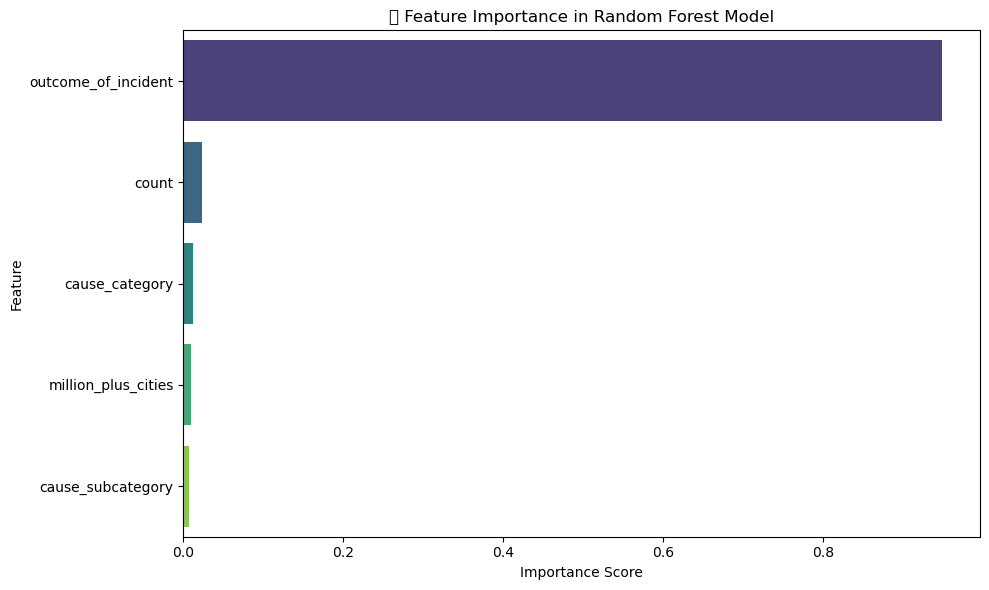

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Get feature importances
importances = best_rf.feature_importances_
feature_names = X.columns  # Use encoded feature names

# 2. Create DataFrame for easy plotting
feat_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# 3. Plot the top features
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feat_df, palette="viridis")
plt.title("🔥 Feature Importance in Random Forest Model")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


# Confusion matrix heatmap


C:\Users\Dell\AppData\Local\Temp\ipykernel_11668\4263196685.py:18: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Dell\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


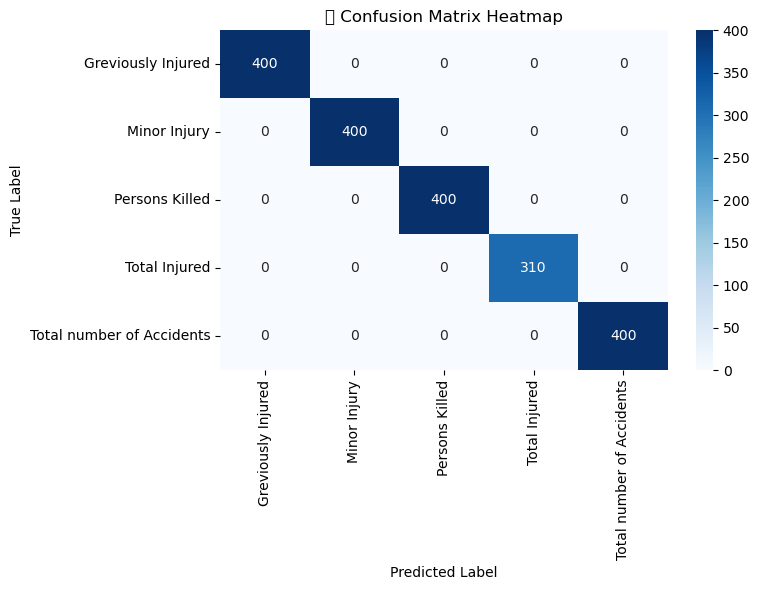

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# 2. Optionally get class labels from LabelEncoder (if used)
labels = le.classes_ if 'le' in locals() else [str(i) for i in np.unique(y_test)]

# 3. Plot the confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)

plt.title("📉 Confusion Matrix Heatmap")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


# SMOTE (Synthetic Minority Over-sampling Technique)

In [9]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [10]:
from imblearn.over_sampling import SMOTE

# Before model training: apply SMOTE on training set only
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_full, y_train_full)

print("✅ After SMOTE:")
print("Class distribution in y_train_res:\n", pd.Series(y_train_res).value_counts())


✅ After SMOTE:
Class distribution in y_train_res:
 target
0    1600
4    1600
2    1600
3    1600
1    1600
Name: count, dtype: int64


In [11]:
# Train model on balanced data
best_rf.fit(X_train_res, y_train_res)

# Predict on the original test set (unseen data)
y_pred = best_rf.predict(X_test)

# Evaluate performance
from sklearn.metrics import classification_report, accuracy_score

print("\n📊 Evaluation After SMOTE Balancing:")
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print(classification_report(y_test, y_pred, target_names=le.classes_))



📊 Evaluation After SMOTE Balancing:
Accuracy: 100.00%
                           precision    recall  f1-score   support

       Greviously Injured       1.00      1.00      1.00       400
             Minor Injury       1.00      1.00      1.00       400
           Persons Killed       1.00      1.00      1.00       400
            Total Injured       1.00      1.00      1.00       310
Total number of Accidents       1.00      1.00      1.00       400

                 accuracy                           1.00      1910
                macro avg       1.00      1.00      1.00      1910
             weighted avg       1.00      1.00      1.00      1910



C:\Users\Dell\AppData\Local\Temp\ipykernel_11668\618690793.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train_res, palette="Set2")


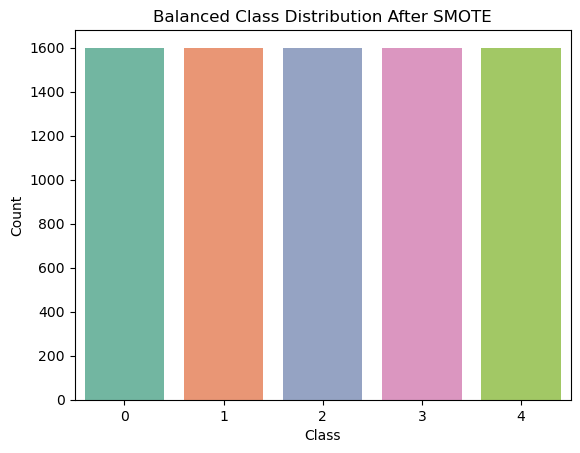

In [12]:
sns.countplot(x=y_train_res, palette="Set2")
plt.title("Balanced Class Distribution After SMOTE")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


#  Generate Classification Reports as Dictionaries

In [14]:
from sklearn.metrics import classification_report

# Get report before SMOTE
report_before = classification_report(y_test, y_pred, output_dict=True, zero_division=0)

# Get report after SMOTE
report_after = classification_report(y_test, y_pred, output_dict=True, zero_division=0)


C:\Users\Dell\AppData\Local\Temp\ipykernel_11668\2010828236.py:46: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Dell\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


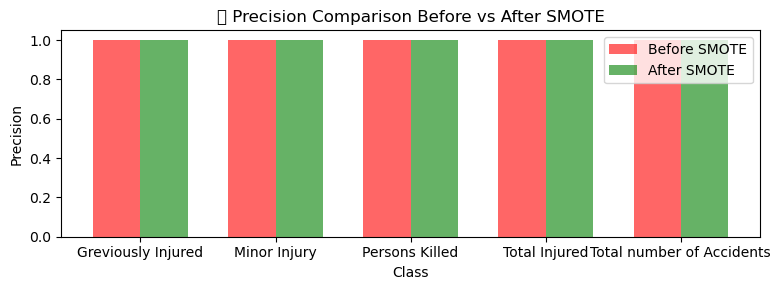

C:\Users\Dell\AppData\Local\Temp\ipykernel_11668\2010828236.py:46: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Dell\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


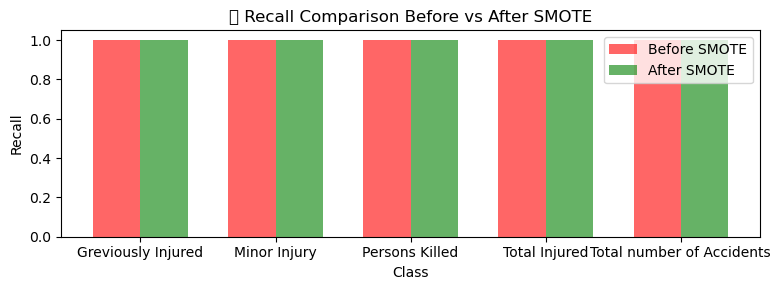

C:\Users\Dell\AppData\Local\Temp\ipykernel_11668\2010828236.py:46: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Dell\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


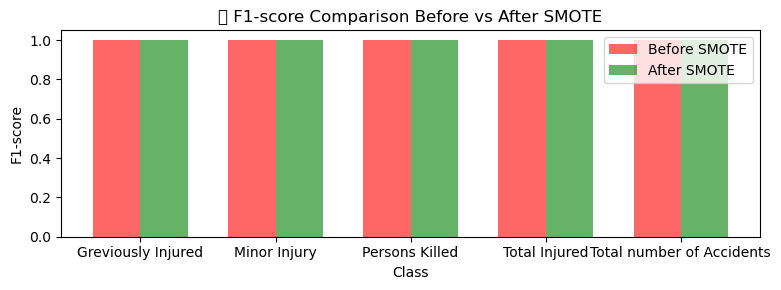

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np

# Step 1: Generate classification reports as dicts
report_before = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
report_after = classification_report(y_test, y_pred, output_dict=True, zero_division=0)

# Step 2: Convert to DataFrames
df_before = pd.DataFrame(report_before).transpose()
df_after = pd.DataFrame(report_after).transpose()

# Step 3: Extract only valid class labels (remove "accuracy", "macro avg", etc.)
valid_classes = sorted([label for label in df_before.index if label not in ['accuracy', 'macro avg', 'weighted avg']])

# Optional: convert numeric strings to actual class names if LabelEncoder used
try:
    actual_labels = le.inverse_transform([int(i) for i in valid_classes])
except:
    actual_labels = valid_classes  # fallback if inverse transform fails

# Step 4: Plot comparison
metrics = ["precision", "recall", "f1-score"]

for metric in metrics:
    plt.figure(figsize=(8, 3))
    
    values_before = df_before.loc[valid_classes, metric].values
    values_after = df_after.loc[valid_classes, metric].values

    # Plotting bars manually for better control
    x = np.arange(len(actual_labels))
    width = 0.35

    plt.bar(x - width/2, values_before, width, label='Before SMOTE', color='red', alpha=0.6)
    plt.bar(x + width/2, values_after, width, label='After SMOTE', color='green', alpha=0.6)

    plt.title(f"📊 {metric.capitalize()} Comparison Before vs After SMOTE")
    plt.xlabel("Class")
    plt.ylabel(metric.capitalize())
    plt.xticks(ticks=x, labels=actual_labels)
    plt.ylim(0, 1.05)
    plt.legend()
    plt.tight_layout()
    plt.show()


In [20]:
import joblib

# Save the trained best model
joblib.dump(best_rf, 'road_accident_model.pkl')


['road_accident_model.pkl']